# Bike Sharing Assignment

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 




## Step 1(a.): Reading and Understanding the data

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression and r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Importing statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 50)

In [3]:
# Reading the data
bike = pd.read_csv(r'C:\Users\SHIPRA SHANDILYA\Downloads\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Inspecting data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Inspecting the number of columns in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Inspecting the shape of dataset
bike.shape

(730, 16)

In [8]:
# Checking the datatypes of the columns
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Step 1(b.): Visualising the Data

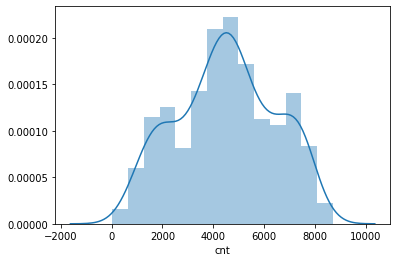

In [9]:
sns.distplot(bike.cnt)
plt.show()

In [10]:
drop_col = ['instant','dteday','casual','registered']
bike = bike.drop(drop_col, axis= 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Mapping all the categorical values to a specific value as mentioned in the dataset dictionary

bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['mnth'] = bike['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov',12: 'dec'})
bike['weekday'] = bike['weekday'].map({0: 'sunday', 1: 'monday',2: 'tuesday',3: 'wednesday',4: 'thursday', 5: 'friday', 6: 'saturday'})
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist_cloudy', 3:'light_snow_rain', 4: 'heavy_snow_rain'})
bike['holiday'] = bike['holiday'].map({0: 'no', 1: 'yes'})
bike['workingday'] = bike['workingday'].map({0: 'holiday', 1: 'working'})
bike['yr'] = bike['yr'].map({0: '2018', 1: '2019'})

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,no,saturday,holiday,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,sunday,holiday,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,monday,working,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,tuesday,working,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,wednesday,working,clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


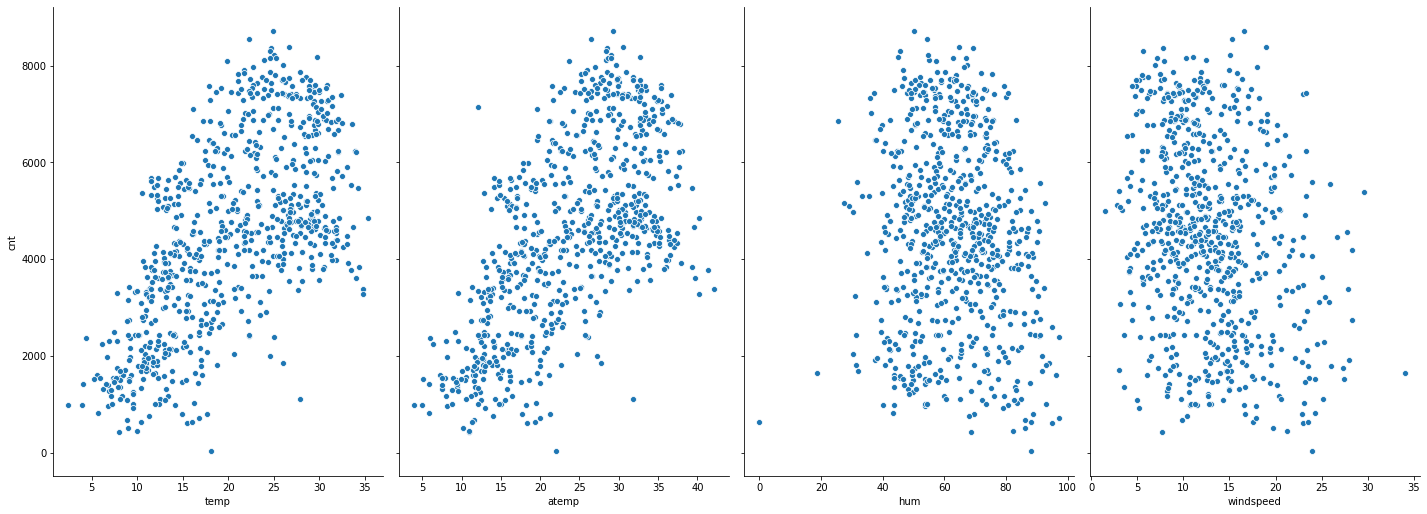

In [14]:
sns.pairplot(bike, x_vars = ['temp', 'atemp','hum','windspeed'], y_vars = 'cnt', height = 7, aspect = 0.7)
plt.show()

- hum and windspeed does not show much of linear relation.

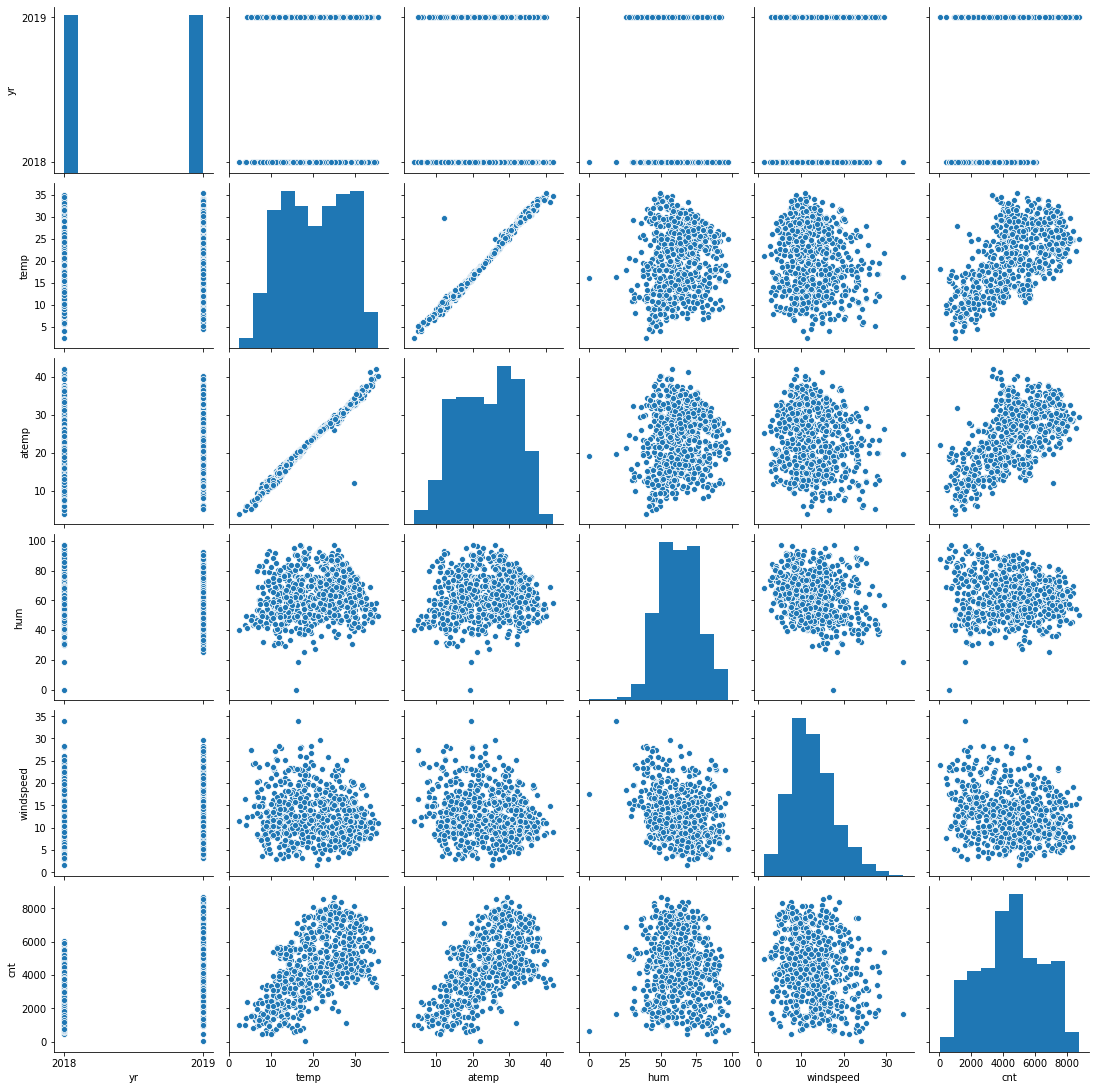

In [15]:
sns.pairplot(bike)
plt.show()

#### Conclusions from the above plot:
- Temp has high linear relationship with cnt.
- Atemp shows a high linear relationship with cnt.
- Hum does not show some good linear relationship with cnt.
- Windspeed does not show a linear relationship with cnt.

#### Since we see from the above graph that we have a high-correlation between the variables 'temp' and 'atemp'. So, we drop one column i.e. 'temp'

In [16]:
bike = bike.drop('temp', axis= 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,jan,no,saturday,holiday,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,sunday,holiday,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,monday,working,clear,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,tuesday,working,clear,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,wednesday,working,clear,11.46350,43.6957,12.522300,1600


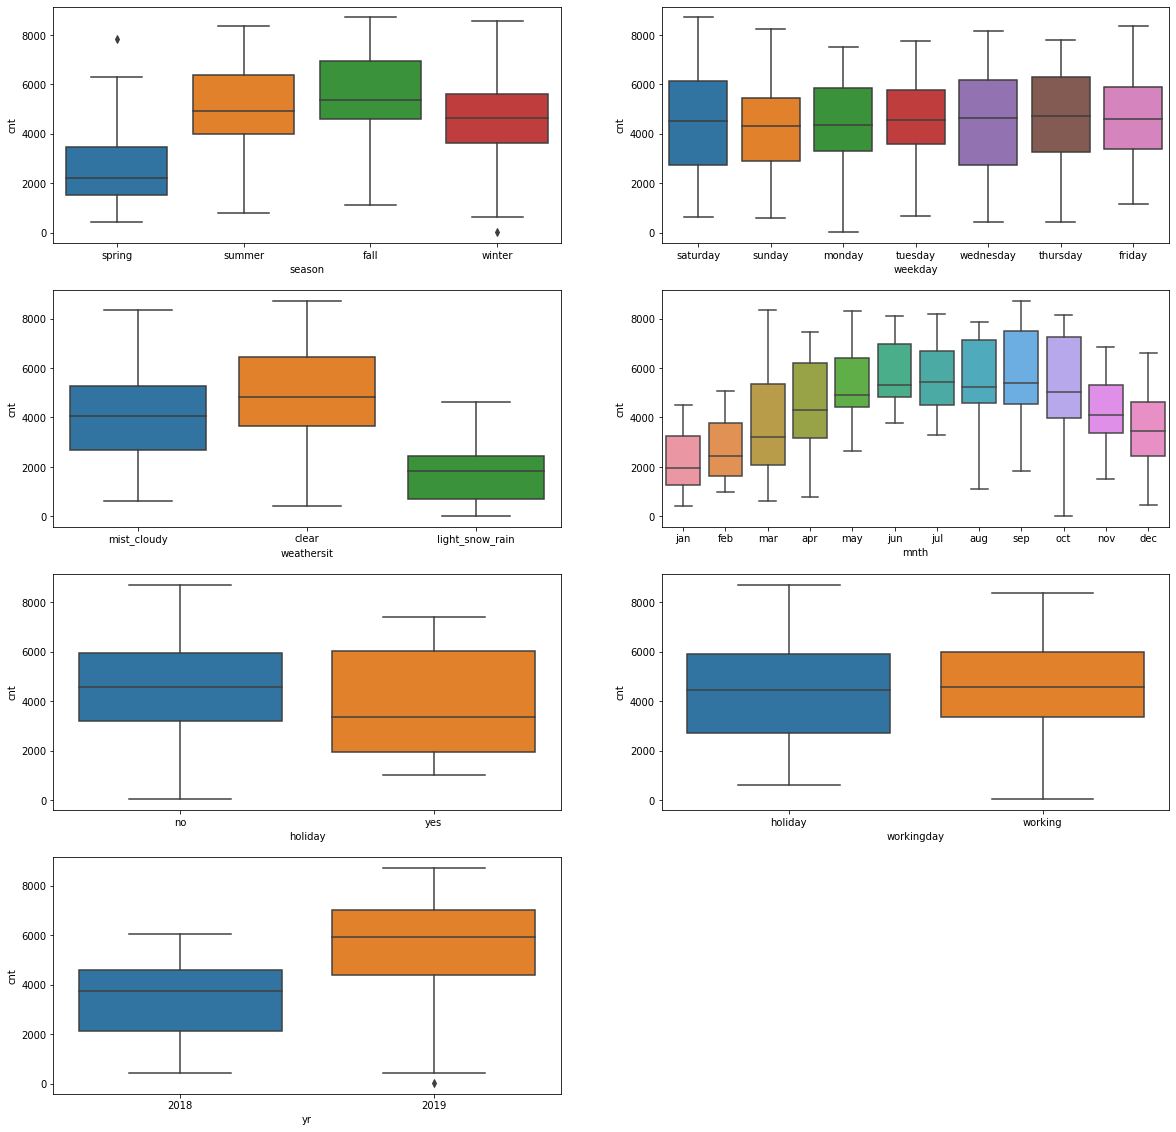

In [17]:
# visualising categorical variables

plt.figure(figsize= (20,20))
plt.subplot(4,2,1)
sns.boxplot(x='season', y= 'cnt', data= bike)
plt.subplot(4,2,2)
sns.boxplot(x='weekday', y= 'cnt', data= bike)
plt.subplot(4,2,3)
sns.boxplot(x='weathersit', y= 'cnt', data= bike)
plt.subplot(4,2,4)
sns.boxplot(x='mnth', y= 'cnt', data= bike)
plt.subplot(4,2,5)
sns.boxplot(x='holiday', y= 'cnt', data= bike)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y= 'cnt', data= bike)
plt.subplot(4,2,7)
sns.boxplot(x='yr', y= 'cnt', data= bike)
plt.show()

#### Observations of the categorical variables from the above plot:
- From the season variable we can observe that fall has highest average as compared to other seasons.
- From Weathersit it can be observed that the count 'cnt' of the people was less who rent the bike.
- On holidays highest number of people rented the bike which is pretty obvious.
- Average of the people renting bike on workingday was more than the holidays.
- In 2019, people starting renting the bikes more as compared to 2018. It can be possible that with due time it became popular
  and we can make a prediction that it will increase in coming period as well.
- When the weather was clear it is obvious that people will go out and hence the bike rents were more then.

## Step 2: Preparing the Data for Modelling
- Encoding the variables:
    - Converting the binary variables to 0 and 1
    - Converting the categorical variables to dummy variables
- Splitting into train and test dataset

In [18]:
# Binary variables:
bike.holiday.value_counts()

no     709
yes     21
Name: holiday, dtype: int64

In [19]:
bike.workingday.value_counts()

working    499
holiday    231
Name: workingday, dtype: int64

In [20]:
bike['holiday'] = bike['holiday'].map({'no': 0, 'yes': 1})
bike['workingday'] = bike['workingday'].map({'holiday': 0, 'working': 1})
bike['yr'] = bike['yr'].map({'2018': 0, '2019':1})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600


#### Dummy Variables

In [21]:
# Creating dummy variables for season
bike_season = pd.get_dummies(bike['season'], drop_first = True)
bike_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Creating dummy variables for month
bike_month = pd.get_dummies(bike['mnth'], drop_first = True)
bike_month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Creating dummy variables for weekday
bike_weekday = pd.get_dummies(bike['weekday'], drop_first = True)
bike_weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [24]:
# Creating dummy variables for weathersit
bike_weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)
bike_weathersit.head()

,light_snow_rain,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Concatenating the dummy dataframe with the  original dataframe

In [25]:
bike = pd.concat([bike, bike_season, bike_month, bike_weekday, bike_weathersit], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
0,spring,0,jan,0,saturday,0,mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sunday,0,mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,monday,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# As we have already created dummy variables for the columns season, mnth, weekday, weathersit.
# So, we can drop these columns from the dataframe.

drop_dum_var = ['season', 'mnth', 'weekday', 'weathersit']
bike = bike.drop(drop_dum_var, axis = 1)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting into train and test dataset

In [27]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Scaling on the continous variables

In [28]:
# Creating the object and creating the list of only continous variables which needs to be scaled

scaler = MinMaxScaler()
cont_vars = ['atemp','hum','windspeed']
bike_train[cont_vars] = scaler.fit_transform(bike_train[cont_vars])
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the Model

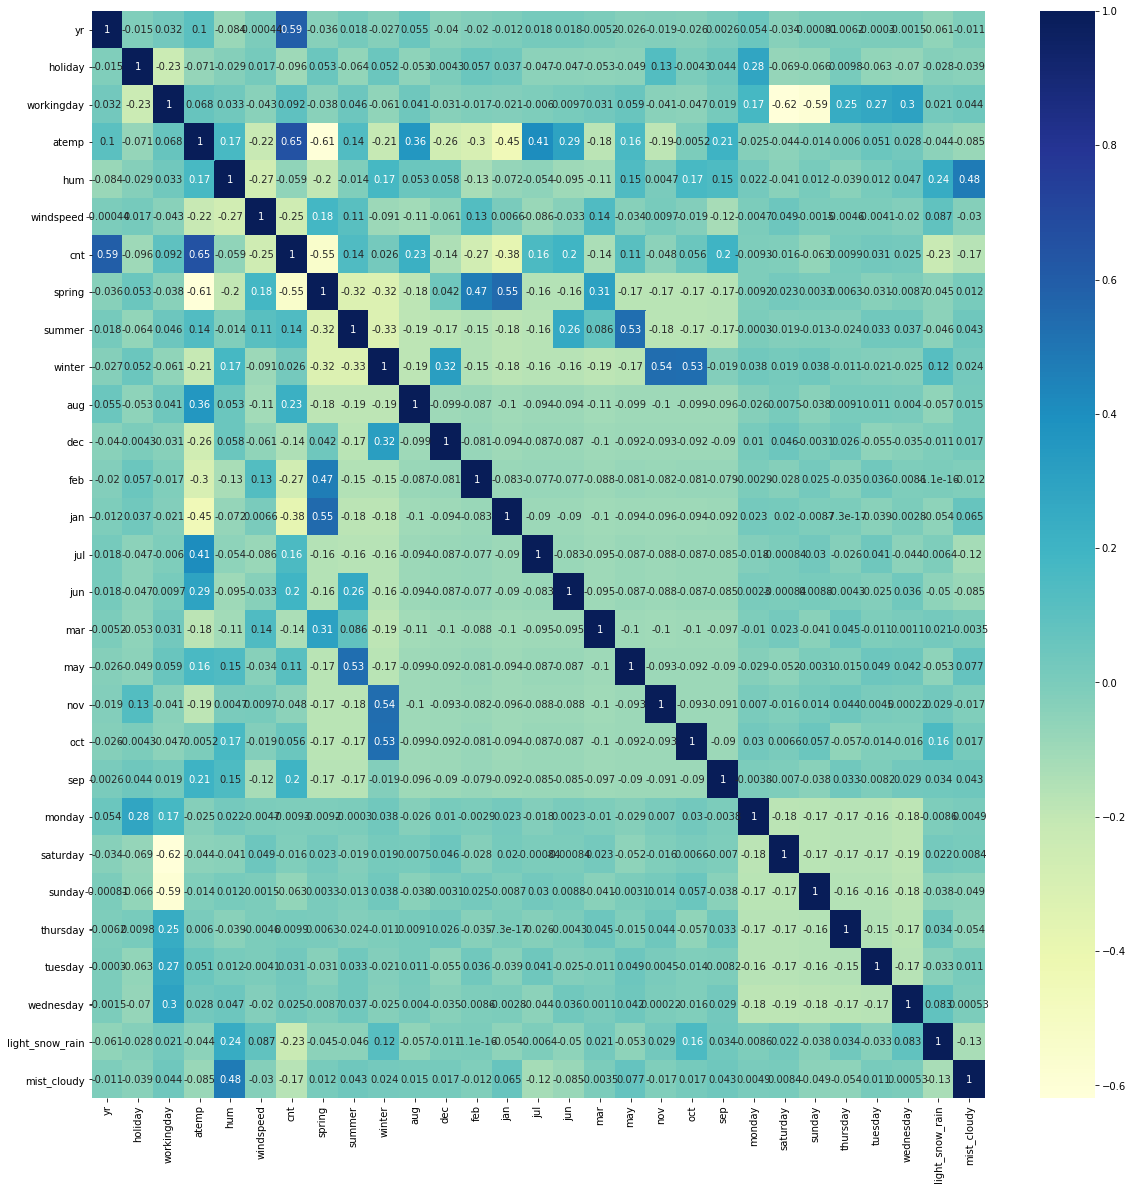

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(bike_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

- Since, from the above heatmap it is very difficult to find the correlation between the variables so we'll 
  find correlation of all the variables with the 'cnt' variable 

In [31]:
# Finding correlation between 'cnt' and other variables
column1 = bike_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'aug',
                      'dec', 'feb', 'jan', 'jul', 'jun','mar', 'may', 'nov', 'oct', 'sep', 'monday', 'saturday', 
                      'sunday','thursday', 'tuesday', 'wednesday', 'light_snow_rain', 'mist_cloudy']]
corr1 = pd.DataFrame(round(column1.corrwith(bike_train['cnt']),4)).reset_index()
corr1.rename(columns={'index': 'variables', 0: 'cnt_corr'}, inplace = True)
corr1.head()

,variables,cnt_corr
0,yr,0.5914
1,holiday,-0.0959
2,workingday,0.0920
3,atemp,0.6479
4,hum,-0.0588


In [32]:
# Finding all the top 10 correlated variables
corr1.sort_values('cnt_corr', ascending = False, inplace = True)
corr1.head(10)

,variables,cnt_corr
3,atemp,0.6479
0,yr,0.5914
9,aug,0.2276
19,sep,0.2016
14,jun,0.1954
13,jul,0.1581
7,summer,0.1403
16,may,0.1133
2,workingday,0.0920
18,oct,0.0556


#### Dividing into X and y sets of the model building

In [33]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [34]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

### Building the model (Variable Selection using RFE)

In [36]:
# Creating the object for LinearRegression and the using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 2),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', False, 7),
 ('jun', False, 6),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'feb', 'jan', 'sep', 'saturday', 'light_snow_rain',
       'mist_cloudy'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['spring', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'monday',
       'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Building model using statsmodel for detailed statistics

In [40]:
# Creating datatframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)

In [42]:
# Running Linear model
lm_1 = sm.OLS(y_train, X_train_sm).fit()

In [43]:
# See the summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.05e-188
Time:                        22:56:21   Log-Likelihood:                -4114.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     494   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1941.5554    277.775     

#### Observation based on summary:
- R-squared for the model with 16 variables comes out to be 84.5%
- Adjusted R-squared for the model is 84%

### Checking VIF

In [44]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'feb', 'jan', 'sep', 'saturday', 'light_snow_rain',
       'mist_cloudy'],
      dtype='object')

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,22.78
3,atemp,13.21
2,workingday,5.15
5,windspeed,4.02
7,winter,2.41
6,summer,2.21
14,mist_cloudy,2.19
0,yr,2.06
12,saturday,1.93
10,jan,1.81


- If VIF is greater the 5 it indicates multicollinearity (>5).
- So, we'll try to keep the variables with VIF values less than 5

#### Model 2:
- We can see that hum has highest VIF but we remove the variables which has high p values and low VIF first.
- Rebuilding the model without 'feb' variables.
- As now we are doing manual approach(dropping variables manually) it is always suggested to drop variables one by one.

In [46]:
X_train_2 = X_train_rfe.drop(['feb'], axis = 1)

In [47]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_2)

# Running the linear model
lm_2 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.52e-188
Time:                        22:56:22   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1816.1034    263.156     

In [48]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,20.07
3,atemp,11.71
2,workingday,5.09
5,windspeed,3.83
13,mist_cloudy,2.16
0,yr,2.04
7,winter,2.03
6,summer,1.97
11,saturday,1.92
9,jan,1.57


#### Observation from summary statistics of Model 2:
- R-squared after dropping the 'feb' variable is 84.4% which is a difference of 0.01% from then previous model(not much difference).
- Adjusted R- squared is 83.9%

#### Model 3:
- Removing the 'holiday' column as it has comparatively high p-value

In [49]:
X_train_3 = X_train_rfe.drop(['feb','holiday'], axis = 1)

In [50]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_3)

# Running the linear model
lm_3 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.87e-189
Time:                        22:56:23   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1734.8343    260.566     

In [51]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.69
2,atemp,11.71
1,workingday,4.59
4,windspeed,3.77
12,mist_cloudy,2.15
0,yr,2.04
6,winter,2.02
5,summer,1.97
10,saturday,1.81
7,aug,1.56


#### Model 4:
- Removing 'hum' column from the dataset as it has high VIF

In [52]:
X_train_4 = X_train_rfe.drop(['feb','holiday','hum'], axis = 1)

In [53]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_4)

# Running the linear model
lm_4 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.96e-186
Time:                        22:56:24   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             940.8923    187.239     

In [54]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.22
1,workingday,4.31
3,windspeed,3.56
0,yr,2.04
4,summer,1.93
9,saturday,1.76
5,winter,1.60
11,mist_cloudy,1.57
6,aug,1.56
8,sep,1.31


#### Model 5:

In [55]:
X_train_5 = X_train_rfe.drop(['feb','holiday','hum','jan'], axis = 1)

In [56]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_5)

# Running the linear model
lm_5 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.15e-186
Time:                        22:56:25   Log-Likelihood:                -4130.0
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             699.2073    165.262     

In [57]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,summer,1.83
8,saturday,1.69
6,aug,1.55
10,mist_cloudy,1.54
5,winter,1.52
7,sep,1.30


- We can make a note from the above VIF values that as we remove 'hum' column from the dataset we find that the VIF values decreases for every other variables(apprx. half from the previous model)

#### Model 6:

In [58]:
X_train_6 = X_train_rfe.drop(['feb','holiday','hum','jan','workingday'], axis = 1)

In [59]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_6)

# Running the linear model
lm_6 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.94e-182
Time:                        22:56:26   Log-Likelihood:                -4141.6
No. Observations:                 510   AIC:                             8305.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1058.2770    150.849     

In [60]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.93
2,windspeed,3.09
0,yr,2.00
3,summer,1.83
5,aug,1.55
4,winter,1.50
9,mist_cloudy,1.49
6,sep,1.30
7,saturday,1.18
8,light_snow_rain,1.08


### Model 7: FINAL MODEL

In [61]:
X_train_7 = X_train_rfe.drop(['feb','holiday','hum','jan','workingday','saturday'], axis = 1)

In [62]:
# Adding constant variable
X_train_sm = sm.add_constant(X_train_7)

# Running the linear model
lm_7 = sm.OLS(y_train, X_train_sm).fit()

# Now let's again the see the summary of the model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.58e-182
Time:                        22:56:27   Log-Likelihood:                -4143.3
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     500   BIC:                             8349.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1087.5914    150.357     

In [63]:
# VIF 
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.92
2,windspeed,3.02
0,yr,2.00
3,summer,1.83
5,aug,1.54
4,winter,1.50
8,mist_cloudy,1.49
6,sep,1.30
7,light_snow_rain,1.08


### Model 7 is the FINAL MODEL 
- The model has 9 variables.
- The significance level or p-values for the variables is 0
- The VIF (Variance Inflation Factor) for all the variables are less than 5.

### Variables Observations:
- Positive coefficients:

   - atemp has the highest coefficient which means it affects the number of people taking the bike rentals.(atemp plays an important role)
   - In the month of september and in winter season the cnt of bike rentals incraesed.

- Negative Coefficients:

    - light_rain_snow is negatively related which means as when light+rain+snow is there number of rentals 'cnt' decreases.
    - when there is cloud then also the cnt decreased for nbike rentals.

## Step 4: Residual Analysis

In [64]:
y_train_pred = lm_7.predict(X_train_sm)

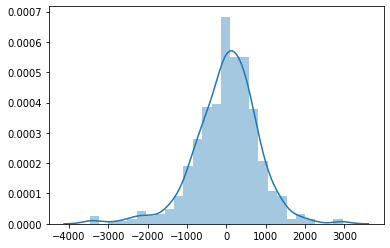

In [65]:
res = y_train - y_train_pred
sns.distplot(res)

Text(0, 0.5, 'cnt')

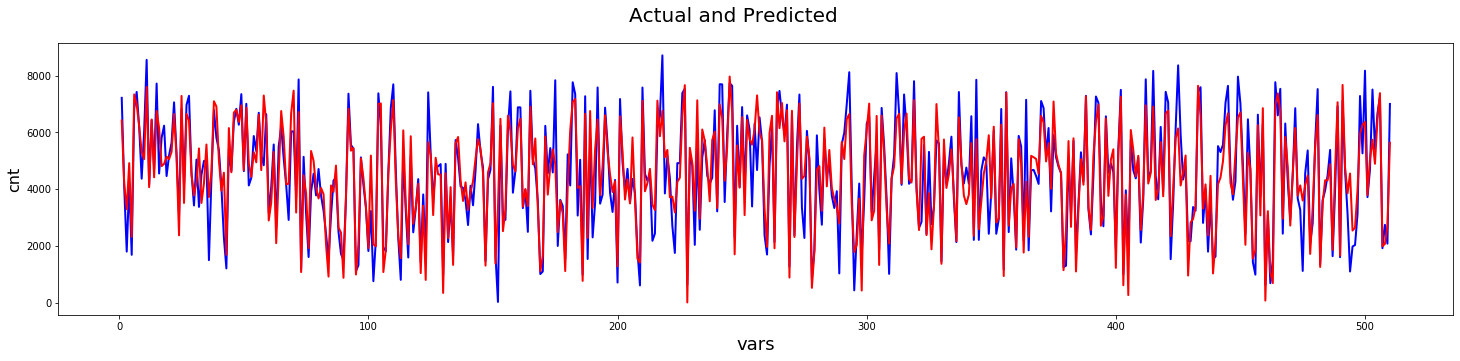

In [66]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (25,5))
plt.plot(c,y_train, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('vars', fontsize=18)                                 # X-label
plt.ylabel('cnt', fontsize=16)   

Text(0, 0.5, 'y_test-y_test_pred')

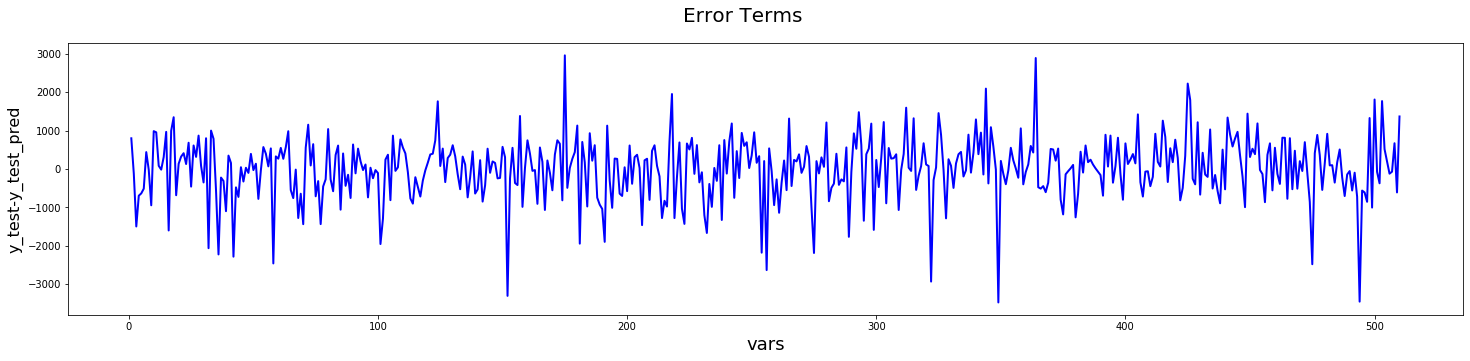

In [67]:
# Error terms
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (25,5))
plt.plot(c, y_train-y_train_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('vars', fontsize=18)                       # X-label
plt.ylabel('y_test-y_test_pred', fontsize=16)         # Y- label

## Step 5: Predictions and Evaluation on the Test Set

In [68]:
# Creating the list of only continous variables which needs to be scaled

cont_vars = ['atemp','hum','windspeed']

# Fit on data

bike_test[cont_vars] = scaler.transform(bike_test[cont_vars])
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
bike_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Creating X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [71]:
# Adding a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow_rain,mist_cloudy
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
# Dropping the variable which we dropped while modelling

X_test_sm = X_test_sm.drop(['feb','holiday','hum','jan','workingday','saturday'], axis = 1)

In [73]:
# And also dropping the columns which were removed while performing RFE
X_test_sm = X_test_sm.drop(['spring', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'monday','dec', 
                            'sunday', 'thursday', 'tuesday', 'wednesday'], axis = 1)

In [74]:
X_test_sm.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'summer', 'winter', 'aug', 'sep',
       'light_snow_rain', 'mist_cloudy'],
      dtype='object')

In [75]:
# Predict
y_test_pred = lm_7.predict(X_test_sm)

In [76]:
# Evaluating the R2_score
r_squared = r2_score(y_true = y_test, y_pred = y_test_pred)
r_squared

0.7923257919867838

In [77]:
# Evaluating MSE mean squared error
mse = mean_squared_error(y_test, y_test_pred)

In [78]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 750204.4124191154
r_square_value : 0.7923257919867838


Text(0, 0.5, 'cnt')

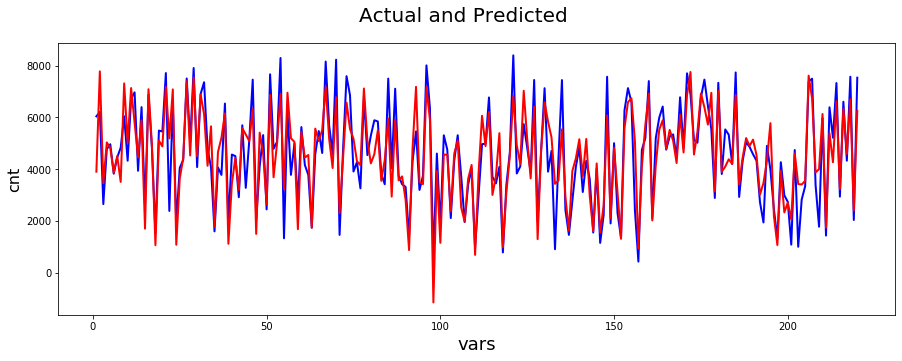

In [79]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (15,5))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)                 # Plot heading 
plt.xlabel('vars', fontsize=18)                                   # X-label
plt.ylabel('cnt', fontsize=16)                                    # Y-label

Text(0, 0.5, 'y_test-y_test_pred')

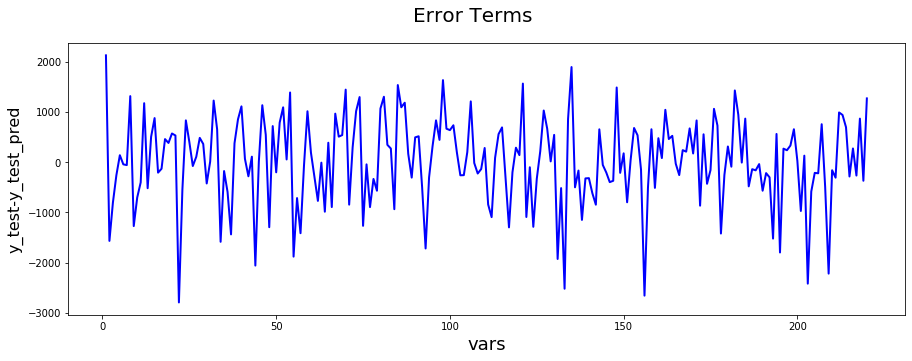

In [80]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize = (15,5))
plt.plot(c, y_test-y_test_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)                      # Plot heading 
plt.xlabel('vars', fontsize=18)                               # X-label
plt.ylabel('y_test-y_test_pred', fontsize=16)                 # Y- label

### Some conclusions from the above models and also the test set:
- The R- squared for the final model is 82.4%
- Adjusted R- squared value is 82.1 % 
- The VIFs for all the variables that are retained in the final model is less than 5 which shows that the  modles are not multicollinear.

- Test Set Observations:
    - The R2_score for the test dataset comes out to be 79.23% 
    - The test dataset fits the model 79.23% which is pretty good
    

### Variables Observations:
- Positive coefficients:

   - atemp has the highest coefficient which means it affects the number of people taking the bike rentals.(atemp plays an important role)
   - In the month of september and in winter season the cnt of bike rentals incraesed.

- Negative Coefficients:

    - light_rain_snow is negatively related which means as when light+rain+snow is there number of rentals 'cnt' decreases.
    - when there is cloud then also the cnt decreased for nbike rentals.